Welcome - we start by loading a package for plotting in Julia

In [1]:
import Pkg; Pkg.add("Plots");

   Resolving package versions...
  No Changes to `C:\Users\ylucet\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ylucet\.julia\environments\v1.10\Manifest.toml`


In [1]:
using Plots

The hard function we discussed in the lecture was
$$f(x)=\exp(x)+x^4+x^2.$$
In Julia this becomes 

In [2]:
f(x)=exp(x)+x^4+x^2

f (generic function with 1 method)

Let's take a look!

In [3]:
 xrange = range(-2, stop = 2, length = 40);

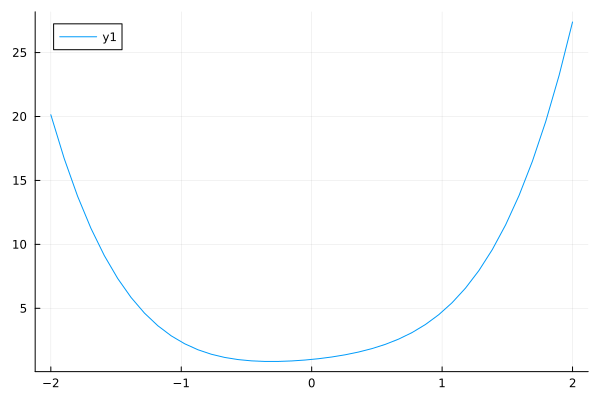

In [4]:
plot(xrange,f)

For future use, we record the first and second derivatives of $f$:
\begin{align*} f_1(x) &:= f'(x) = \exp(x)+4x^3+2x \\ f_2(x) &:= f''(x) = \exp(x)+12x^2+2\end{align*}
You can find these derivatives by hand, by Maple, by WolframAlpha, etc.  
As an aside, we can do this actually also in Julia.

In [6]:
Pkg.add("Calculus"); 

   Resolving package versions...
  No Changes to `C:\Users\ylucet\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ylucet\.julia\environments\v1.10\Manifest.toml`


In [5]:
using Calculus;

In [6]:
f1=derivative(f)

#1 (generic function with 1 method)

In [7]:
f1(1)

8.718281828550825

In [8]:
deparse(simplify(differentiate("exp(x)+x^4+x^2", :x)))

"exp(x) + 4 * x ^ 3 + 2 * x"

In [9]:
f2=derivative(f1)

#1 (generic function with 1 method)

Actually, the "Calculus package" can also work directly with $f'$ as we illustrate.

In [10]:
f2(1)

16.718283108764254

Back to business. We start by running Newton's method for 10 iterations, starting at $1$.

In [11]:
xcurrent = 1

1

In [12]:
for n in 1:10  
       println("n=",n," x=",xcurrent," f(x)=",f(xcurrent)," f'(x)=",f1(xcurrent))       
       xcurrent = xcurrent - f1(xcurrent)/f2(xcurrent) # or use f1 and f2
end

n=1 x=1 f(x)=4.718281828459045 f'(x)=8.718281828550825
n=2 x=0.4785181126655029 f(x)=1.8950925696761507 f'(x)=3.0090010747431633
n=3 x=0.005511689111974805 f(x)=1.0055572860549775 f'(x)=1.0165509543962956
n=4 x=-0.33267434470196255 f(x)=0.839924211997394 f'(x)=-0.09561626982951739
n=5 x=-0.3090366245967567 f(x)=0.8387784611497338 f'(x)=-0.00197585220336112
n=6 x=-0.308527410251854 f(x)=0.8387779579366258 f'(x)=-8.658264650258997e-7
n=7 x=-0.30852718691635433 f(x)=0.8387779579365291 f'(x)=-1.8334264312505154e-11
n=8 x=-0.3085271869116251 f(x)=0.838777957936529 f'(x)=0.0
n=9 x=-0.3085271869116251 f(x)=0.838777957936529 f'(x)=0.0
n=10 x=-0.3085271869116251 f(x)=0.838777957936529 f'(x)=0.0


We observe that Newton's method converges very quickly, to the values seen in the lecture.

Next, we run gradient descent, with *constant* stepsize $1$:

In [13]:
xcurrent = 1
for n in 1:10  
       println("n=",n," x=",xcurrent," f(x)=",f(xcurrent)," f'(x)=",f1(xcurrent))  
       xcurrent = xcurrent - f1(xcurrent)
end

n=1 x=1 f(x)=4.718281828459045 f'(x)=8.718281828550825
n=2 x=-7.7182818285508255 f(x)=3608.3805367436435 f'(x)=-1854.6061813305062
n=3 x=1846.8878995019554 f(x)=Inf f'(x)=NaN
n=4 x=NaN f(x)=NaN f'(x)=NaN
n=5 x=NaN f(x)=NaN f'(x)=NaN
n=6 x=NaN f(x)=NaN f'(x)=NaN
n=7 x=NaN f(x)=NaN f'(x)=NaN
n=8 x=NaN f(x)=NaN f'(x)=NaN
n=9 x=NaN f(x)=NaN f'(x)=NaN
n=10 x=NaN f(x)=NaN f'(x)=NaN


That didn't work out well at all. The reason for failure is that $f'(x)$ is not Lipschitz continuous, because of the exponential term present. However, we can now try backtracking as discussed in the lecture.

In [14]:
xcurrent = 1
for n in 1:10  
    print("n=",n," x=",xcurrent," f(x)=",f(xcurrent)," f'(x)=",f1(xcurrent))  
    t = 1
    while f(xcurrent-t*f1(xcurrent))>f(xcurrent)- 1/2*t*(f1(xcurrent))^2
        t = t/2
    end
       println("  t found through backtracking is ",t)
       xcurrent = xcurrent - t*f1(xcurrent)
end

n=1 x=1 f(x)=4.718281828459045 f'(x)=8.718281828550825  t found through backtracking is 0.0625
n=2 x=0.4551073857155734 f(x)=1.8263652094936382 f'(x)=2.863609763413101  t found through backtracking is 0.125
n=3 x=0.09715616528893578 f(x)=1.1115608806254647 f'(x)=1.3000131427169808  t found through backtracking is 0.25
n=4 x=-0.2278471203903094 f(x)=0.8508553861865966 f'(x)=0.2932376350951671  t found through backtracking is 0.25
n=5 x=-0.3011565291641012 f(x)=0.8388828224057941 f'(x)=0.028395006778761257  t found through backtracking is 0.25
n=6 x=-0.3082552808587915 f(x)=0.8387781012255981 f'(x)=0.0010538778880871999  t found through backtracking is 0.25
n=7 x=-0.30851875033081333 f(x)=0.8387779580744961 f'(x)=3.2706668282588916e-5  t found through backtracking is 0.25
n=8 x=-0.308526926997884 f(x)=0.8387779579366601 f'(x)=1.0076511666152835e-6  t found through backtracking is 0.25
n=9 x=-0.3085271789106756 f(x)=0.8387779579365292 f'(x)=3.103074234891498e-8  t found through backtracki

That worked great! Finally, we solve this using a solver.

In [19]:
Pkg.add("JuMP"); Pkg.add("Ipopt");

   Resolving package versions...
   Installed JuMP ─ v1.20.0
    Updating `C:\Users\ylucet\.julia\environments\v1.10\Project.toml`
  [4076af6c] + JuMP v1.20.0
    Updating `C:\Users\ylucet\.julia\environments\v1.10\Manifest.toml`
  [4076af6c] + JuMP v1.20.0
Precompiling project...
  ✓ JuMP
  1 dependency successfully precompiled in 21 seconds. 166 already precompiled.
   Resolving package versions...
   Installed MUMPS_seq_jll ── v500.600.201+0
   Installed Hwloc_jll ────── v2.10.0+0
   Installed ASL_jll ──────── v0.1.3+0
   Installed Ipopt_jll ────── v300.1400.1400+0
   Installed OpenBLAS32_jll ─ v0.3.24+0
   Installed SPRAL_jll ────── v2024.1.18+0
   Installed METIS_jll ────── v5.1.2+0
   Installed Ipopt ────────── v1.6.2
    Updating `C:\Users\ylucet\.julia\environments\v1.10\Project.toml`
  [b6b21f68] + Ipopt v1.6.2
    Updating `C:\Users\ylucet\.julia\environments\v1.10\Manifest.toml`
  [b6b21f68] + Ipopt v1.6.2
  [ae81ac8f] + ASL_jll v0.1.3+0
  [e33a78d0] + Hwloc_jll v2.10.0+0
  

In [15]:
using JuMP; using Ipopt;

In [19]:
m = Model(Ipopt.Optimizer)
@variable(m, x);
@NLobjective(m,Min,exp(x)+x^4+x^2);
optimize!(m);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

In [20]:
optimal_x = value(x)
println("x = ", optimal_x," f(x)=",f(optimal_x))


x = -0.30852718692359216 f(x)=0.838777957936529
